# Objectives
In this code, the exported data for aruco-board and cautery pen's tip location is analyzed.
The data is stored in the "output" folder. Following are the general objectives:
* Basic EDA of both the DFs.
* Assess if dataset claning is necessary
* Produce some sample images and data of tip location detection anomally.
* Mean and STD of distance variation between tip and board location for each frame where both were detected
* Mean and STD of board location.
*  Mean and STD of tip location.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

# Data: Input_2
Folloing are samples of the aruco and tip location data we have. The (x,y,z) coordinate corresponds to the camera coordinate system. Following is the cooridnate system used in opencv. In the data, the Frame column represents the frame number at which the readings were made. All units in the data are in cm.

<img src="https://docs.opencv.org/2.4/_images/pinhole_camera_model.png">

In the data capture system, the camera was fixed on a rig. The aruco baord was also fixed and was not moved during the video capture. Only the hand containing the pen was moved while keeping the tip of the pen exactly on the tracked point of the aruco board. In every frame of the videos, both hand and the board were sumltaneously present.

In [2]:
excel_file_name = "input_2.xlsx"
excel_folder_name = "output"
excel_file_path = "./" + excel_folder_name + "/" + excel_file_name
tip_locs = pd.read_excel(excel_file_path, sheet_name = "tip_locs")
board_locs = pd.read_excel(excel_file_path, sheet_name = "board_locs")

In [3]:
print("Some samples of board_locs:")
board_locs.head()

Some samples of board_locs:


,Frame,x,y,z
0,0,20.880371,24.985730,116.788940
1,1,21.311613,24.938048,116.905841
2,2,21.249105,24.929874,116.758714
3,3,21.138753,24.993437,116.805744
4,4,21.045510,24.994587,116.803087


In [4]:
print("Some samples of tip_locs: ")
tip_locs.head()

Some samples of tip_locs: 


,Frame,x,y,z
0,10,21.559866,21.166268,100.017736
1,11,15.937272,16.383356,80.467353
2,12,21.066827,17.923274,95.467123
3,13,19.127123,17.177702,89.382930
4,14,19.032855,16.209526,89.972221


## Basic EDA
First lets get a general idea of data.
### Board Location EDA
Following is the basic EDA of aruco board data.  
Mean is \[20.807605	25.017660	116.589964\].  
Std is \[0.176844	0.020978	0.146888\].  
It seems like the board's location is pretty stable. The maximum std is only 0.17 cm along the x axis.

In [5]:
print("Basic board location data stats: ")
board_locs.describe()

Basic board location data stats: 


,Frame,x,y,z
count,249.000000,249.000000,249.000000,249.000000
mean,124.000000,20.807605,25.017660,116.589964
std,72.024301,0.176844,0.020978,0.146888
min,0.000000,20.603024,24.929874,116.303842
25%,62.000000,20.662478,25.001939,116.473077
50%,124.000000,20.696869,25.017570,116.537212
75%,186.000000,21.020370,25.034639,116.747465
max,248.000000,21.311613,25.062135,116.905841


### Tip Location EDA
Following is the basic EDA of tip location data.  
From the data, location mean is = \[18.973444	17.550786	93.035197\]  
std is \[5.955726	6.203668	22.588288\].  
From std information it seems that in every axis the estimation varies a lot, with minimum of 6 cm in x axis and 22.58 cm in z axis.

In comparison to input_1 video's data, this is much higher. In input_1 video, max std of z axis (5 cm).

In [6]:
print("Basic tip_locs stats: ")
tip_locs.describe()

Basic tip_locs stats: 


,Frame,x,y,z
count,182.000000,182.000000,182.000000,182.000000
mean,138.368132,18.973444,17.550786,93.035197
std,70.227662,5.955726,6.203668,22.588288
min,10.000000,1.488969,-19.396569,0.004712
25%,77.250000,15.939588,16.217806,89.832410
50%,148.500000,18.621758,18.074069,93.795821
75%,200.750000,21.558856,20.021414,102.369283
max,247.000000,39.726533,27.977154,129.392684


### Possible Anomalies in Tip Location Data
As DOPE isn't perfect, there might be several outliers affecting the above EDA. In this part, let's look at some of this possible sources annomalies.

#### Duplicates in tip_locs
Frame number will be duplicates if in any frame two cubes were identified by dope. For input_2 it seems like there are no duplicates in "Frame" column.

In [12]:
dups = tip_locs["Frame"].duplicated()
print("Number of frames with more than one cube identified: {}".format(dups.sum()))


Number of frames with more than one cube identified: 0


#### Anomalous Detecion
Sometimes DOPE estimates other objects wrongly as the hand carrying the pen. I did keep the background as clean as possible to test in ideal conditions. However, there might be anomalies. Following are the plots of the coordinates in cm.

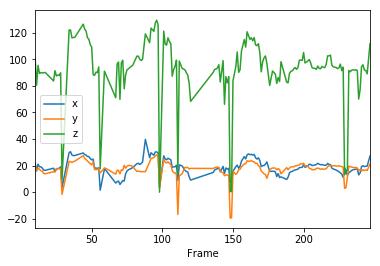

In [13]:
tip_locs.plot("Frame")

From the plot it can be safely assumed that out of 182 frames, at-least in 6 frames the detection was anomalous. I will not be deleting these entries from the data. That is because, these anomalies actually represent the real behaviour of DOPE in experiment.

## Tip Tracking Validation
Let's now validate the tip localization. To do that, I will consider only those frames where both tip and board was identified.

In [9]:
common_board_locs = board_locs[board_locs.Frame.isin(tip_locs.Frame)] 
common_board_locs.describe()

,Frame,x,y,z
count,182.000000,182.000000,182.000000,182.000000
mean,138.368132,20.785571,25.020815,116.568327
std,70.227662,0.161627,0.019038,0.139644
min,10.000000,20.624535,24.970957,116.303842
25%,77.250000,20.664419,25.006478,116.469147
50%,148.500000,20.693742,25.021630,116.517896
75%,200.750000,21.015957,25.036823,116.715361
max,247.000000,21.064778,25.058086,116.854839


In [10]:
common_tip_locs = tip_locs[tip_locs.Frame.isin(board_locs.Frame)]
common_tip_locs.describe()

,Frame,x,y,z
count,182.000000,182.000000,182.000000,182.000000
mean,138.368132,18.973444,17.550786,93.035197
std,70.227662,5.955726,6.203668,22.588288
min,10.000000,1.488969,-19.396569,0.004712
25%,77.250000,15.939588,16.217806,89.832410
50%,148.500000,18.621758,18.074069,93.795821
75%,200.750000,21.558856,20.021414,102.369283
max,247.000000,39.726533,27.977154,129.392684


The mean and STD of the difference between estimated board and tip locations are:


In [22]:
print("Mean:")
print(np.mean(common_board_locs[["x","y","z"]] - common_tip_locs[["x","y","z"]]))
print("\nSTD:")
print(np.std(common_board_locs[["x","y","z"]] - common_tip_locs[["x","y","z"]]))

Mean:
x     1.672333
y     7.915888
z    24.746476
dtype: float64

STD:
x     5.868959
y     6.214237
z    23.435886
dtype: float64
